In [1]:
import numpy as np
import roadrunner
import pandas as pd
import matplotlib.pyplot as plt

SEED=1
np.random.seed(seed=SEED)

# Model system parameters
MODEL_SBML_FILE = "model_Shp2.xml"
DURATION = 700

# Synthetic dataset parameters
NOISE = 0.02 # % Gaussian noise (range is 0-1)
N_PTS = DURATION * 1000 + 1
T_PTS = np.arange(0,111,10).astype(float)
T_PTS

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110.])

In [2]:
def gaussian_noise(x,std,mu=0):
	noise = np.random.normal(mu, std, size = x.shape)
	x_noisy = x + noise
	return x_noisy

rr = roadrunner.RoadRunner(MODEL_SBML_FILE)
rr.integrator.absolute_tolerance = 5e-10
rr.integrator.relative_tolerance = 1e-8

rr.resetAll()
rr.timeCourseSelections = ["time", "pYR"]
res = rr.simulate(times=T_PTS)
prod_traj = res[:, 1]
std = NOISE * prod_traj
noisy_data = gaussian_noise(prod_traj, std)
rr.resetAll()
rr.timeCourseSelections = ["time", "pYR"]
res = rr.simulate(0,120, 1201)

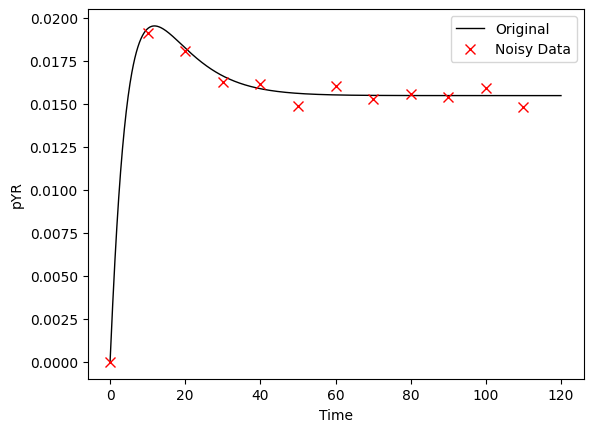

In [3]:
plt.figure(dpi=100)
plt.plot(res[:,0], res[:,1], 'k-', lw=1, label="Original")
plt.plot(T_PTS, noisy_data, 'rx', markersize=7, label="Noisy Data")
plt.legend()
plt.xlabel("Time");
plt.ylabel("pYR");

In [4]:
N_DATA = len(T_PTS)
# Save for later
df = pd.DataFrame()

df["observableId"] = ["observable_pYR"] * N_DATA
df["simulationConditionId"] = ["simCondition"] * N_DATA
df["measurement"] = noisy_data
df["time"] = T_PTS
#df["noiseParameters"] = [0] * N_DATA
df.to_csv("measurementData_Shp2.tsv", sep="\t", index=False)
df

,observableId,simulationConditionId,measurement,time
0,observable_pYR,simCondition,0.000000,0.0
1,observable_pYR,simCondition,0.019141,10.0
2,observable_pYR,simCondition,0.018059,20.0
3,observable_pYR,simCondition,0.016272,30.0
4,observable_pYR,simCondition,0.016160,40.0
5,observable_pYR,simCondition,0.014895,50.0
6,observable_pYR,simCondition,0.016065,60.0
7,observable_pYR,simCondition,0.015260,70.0
8,observable_pYR,simCondition,0.015586,80.0
9,observable_pYR,simCondition,0.015408,90.0


In [5]:
!petablint ./Shp2.yaml

/home/larkinit/anaconda3/envs/test1/lib/python3.12/site-packages/petab/v2/__init__.py:12: UserWarning: Support for PEtab2.0 and all of petab.v2 is experimental and subject to changes!
  warn(
